In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Pipeline

In [10]:
cs_2 = read_customer_data().pipe(standardize).pipe(dup).pipe(fill_null).pipe(drop_colm).pipe(transform)
cs_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 10908
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          7661 non-null   object 
 1   customer_lifetime_value        8123 non-null   float64
 2   response                       7661 non-null   object 
 3   coverage                       8123 non-null   object 
 4   effective_to_date              8123 non-null   object 
 5   employmentstatus               8123 non-null   object 
 6   gender                         8123 non-null   object 
 7   income                         8123 non-null   int64  
 8   location_code                  8123 non-null   object 
 9   marital_status                 8123 non-null   object 
 10  monthly_premium_auto           8123 non-null   int64  
 11  months_since_last_claim        8123 non-null   float64
 12  months_since_policy_inception  8123 non-null   

<ipython-input-8-baaf3529863f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_2["total_claim_amount"]=round(cs_2["total_claim_amount"],0) # rounding total claim amount
<ipython-input-8-baaf3529863f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_2["customer_lifetime_value"]=round(cs_2["customer_lifetime_value"],0) # rounding clv
<ipython-input-8-baaf3529863f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

# Cleaning with functions

In [3]:
#reading date:

def read_customer_data():
    return pd.read_csv("./Data_Marketing_Customer_Analysis_Round2.csv")

In [4]:
#standardizing column names:

def standardize(cs_2):
    new_columns = cs_2.columns.str.lower().str.replace(" ", "_")
    cs_2.columns = new_columns
    return cs_2

In [5]:
#duplicates

def dup(cs_2):
    cs_2 = cs_2.drop_duplicates().reset_index()
    cs_2.drop(columns=["index"], inplace=True)
    return cs_2

In [6]:
#Replacing null values ->mean
def fill_null(cs_2):
    cs_2["number_of_open_complaints"] = cs_2["number_of_open_complaints"].fillna(value=0)
    mean_months = round(cs_2["months_since_last_claim"].mean())
    cs_2["months_since_last_claim"] = cs_2["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(cs_2["income"].mean())
    cs_2["income"] = cs_2["income"].fillna(value=mean_income)
    return cs_2

In [7]:
def drop_colm(cs_2):
    cs_2.drop(columns=["unnamed:_0", "customer", "number_of_open_complaints", "vehicle_type", "education"], inplace=True)
    return cs_2

In [8]:
def transform(cs_2):
    cs_2=cs_2[cs_2['income']>0] # filtering income
    cs_2["total_claim_amount"]=round(cs_2["total_claim_amount"],0) # rounding total claim amount
    cs_2["customer_lifetime_value"]=round(cs_2["customer_lifetime_value"],0) # rounding clv
    cs_2.vehicle_class[cs_2.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    cs_2.vehicle_class[cs_2.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    cs_2.policy[cs_2.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    cs_2.policy[cs_2.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    cs_2.policy[cs_2.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    cs_2.number_of_policies[cs_2.number_of_policies>2]=3
    return cs_2

In [9]:
cs_2.head()

NameError: name 'cs_2' is not defined

## Grouping categories

In [11]:
# bucketing data state groups

def state_group(x):
    
    #nan values
    if not x==x:
        return x
    else:
        dct_ = {"Washington":"west_coast" ,
                "Arizona": "midwest" ,
                "Nevada": "west_coast" ,
                "California": "west_coast" ,
                "Oregon": "west_coast" ,
               }
        return dct_[x]


cs_2["state"] = cs_2["state"].apply(state_group)

In [ ]:
#groupby education
def education_class_group(x):
    
    #nan values
    if not x==x:
        return x
    else:
        dct_ = {"College": "College", "Bachelor": "Bachelor","High School or Below": "High School or Below", 
                "Doctor":"higher_education", "Master": "higher_education"
               }
        return dct_[x]


cs_2["education"] = cs_2["education"].apply(education_class_group)

In [12]:
cs_2.education.unique()

AttributeError: 'DataFrame' object has no attribute 'education'

## Activity 3

In [13]:
cs_2["effective_to_date"]

0        2/18/11
2        2/10/11
3        1/11/11
4        1/17/11
5        2/14/11
          ...   
10902    1/24/11
10903     1/7/11
10906     1/6/11
10907     2/6/11
10908    2/13/11
Name: effective_to_date, Length: 8123, dtype: object

In [14]:

#set to datetime set

cs_2["effective_to_date"] = pd.to_datetime(cs_2["effective_to_date"])

In [15]:
#cs_2["month"]=list(map(lambda date:date.strftime (format=%B),df["date"]))

In [16]:
cs_2["effective_to_date"]

0       2011-02-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
5       2011-02-14
           ...    
10902   2011-01-24
10903   2011-01-07
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
Name: effective_to_date, Length: 8123, dtype: datetime64[ns]

In [17]:
#store in new column month

cs_2["month"] = pd.DatetimeIndex(cs_2["effective_to_date"]).month

#show information of first quarter

In [18]:
cs_2["month"].unique() 

#no march

array([2, 1])

In [19]:
# filter data to show information of first quarter

cs_2.month.describe()

count    8123.000000
mean        1.470023
std         0.499131
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: month, dtype: float64

In [20]:
cs_2[cs_2["month"] >=2] #data first quarter

,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,midwest,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,2
2,west_coast,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,2
5,NaN,4745.0,NaN,Basic,2011-02-14,Employed,M,50549,Suburban,Divorced,61,2.0,73,3,Personal Auto,Personal,Offer1,Agent,293.0,Four-Door Car,Medsize,2
6,west_coast,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,2
7,west_coast,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,63,35.0,45,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10890,west_coast,4660.0,No,Basic,2011-02-03,Employed,F,89834,Rural,Married,116,24.0,11,1,Corporate Auto,Corporate,Offer1,Branch,43.0,NaN,NaN,2
10893,west_coast,4818.0,No,Basic,2011-02-26,Employed,M,38157,Rural,Married,61,2.0,39,3,Personal Auto,Personal,Offer3,Branch,82.0,Two-Door Car,Medsize,2
10894,NaN,6314.0,NaN,Extended,2011-02-27,Employed,F,66947,Suburban,Married,78,13.0,12,3,Personal Auto,Personal,Offer3,Agent,374.0,Four-Door Car,Small,2
10907,midwest,23893.0,No,Extended,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,2,Corporate Auto,Corporate,Offer1,Web,381.0,Luxury Car,Medsize,2


# Activty 4 Plotting

## Plot: Number of responses

In [ ]:
# Number of responses:

number_of_response=cs_2["response"].value_counts()
number_of_response

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title("Number of responses")

sns.barplot(x=number_of_response.index ,y =number_of_response)


## Plot: Response rate by channel

In [ ]:
response_rate= cs_2.groupby(["sales_channel",'response']).size().reset_index(name="Count")


In [ ]:
response_rate

In [ ]:
fig2, ax2 =plt.subplots ()

ax2.set_title("Response rate by channel")

sns.barplot(x=response_rate["response"], y=response_rate["Count"], hue= response_rate["sales_channel"])

## Plot: response rate by the total claim amount

In [ ]:
response_total_claim=cs_2.groupby(["total_claim_amount", "response"]).sum().reset_index()


In [ ]:
response_total_claim

In [ ]:
sns.catplot(x='response', y='total_claim_amount', data = cs_2, kind= "box")


## Plot: Response rate by income.

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=cs_2)
plt.ylabel('Response by Income')
plt.show()

## Heatmap

In [ ]:
sns.heatmap(cs_2.corr());

## Activity 5

### getting numerical data:

In [22]:
numerical = cs_2.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,month
0,4809.0,48029,61,7.0,52,3,293.0,2
2,14948.0,22139,100,34.0,31,2,480.0,2
3,22332.0,49078,97,10.0,3,2,484.0,1
4,9025.0,23675,117,15.0,31,3,708.0,1
5,4745.0,50549,61,2.0,73,3,293.0,2
...,...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,1,655.0,1
10903,2772.0,59855,74,30.0,82,1,355.0,1
10906,5259.0,61146,65,7.0,68,3,273.0,1
10907,23893.0,39837,201,11.0,63,2,381.0,2


### getting categorical data:

In [23]:
categorical = cs_2.select_dtypes(include=np.object)
categorical

<ipython-input-23-657d7d7ea447>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = cs_2.select_dtypes(include=np.object)


,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,midwest,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,west_coast,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,west_coast,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
4,west_coast,No,Premium,Medical Leave,F,Suburban,Married,Personal Auto,Personal,Offer1,Branch,Four-Door Car,Medsize
5,NaN,NaN,Basic,Employed,M,Suburban,Divorced,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,west_coast,No,Extended,Employed,F,Suburban,Married,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,midwest,No,Basic,Employed,M,Suburban,Married,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,west_coast,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize
10907,midwest,No,Extended,Employed,F,Rural,Married,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize


#### Check the normality of the numerical variables visually:

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


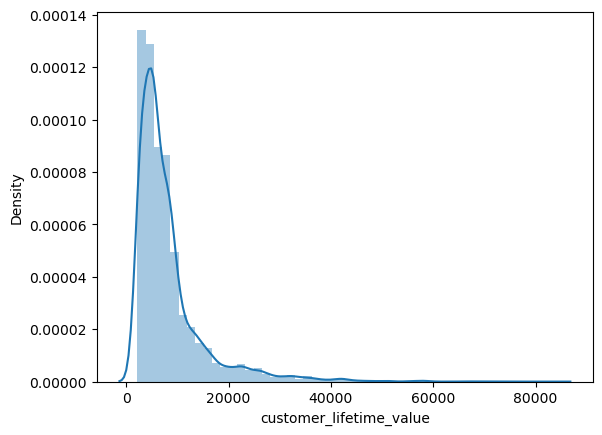

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


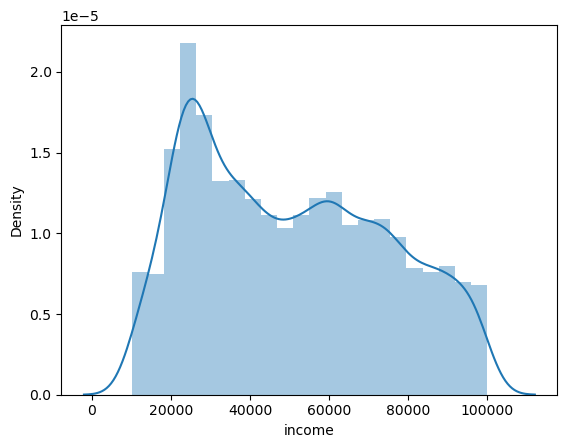

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


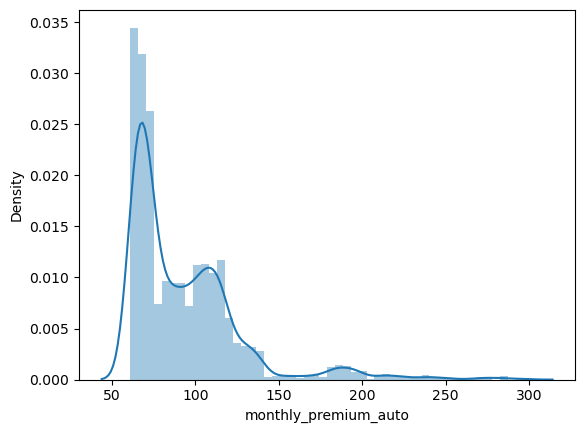

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


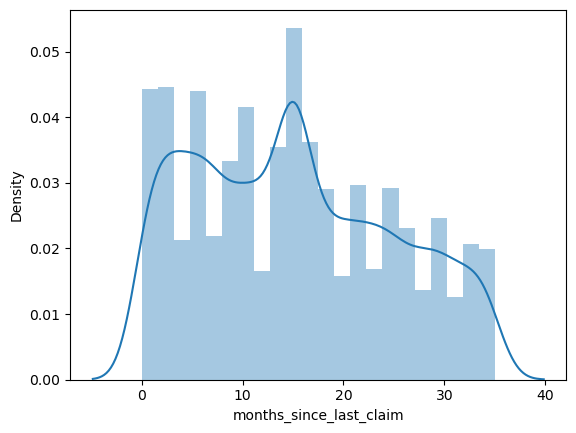

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


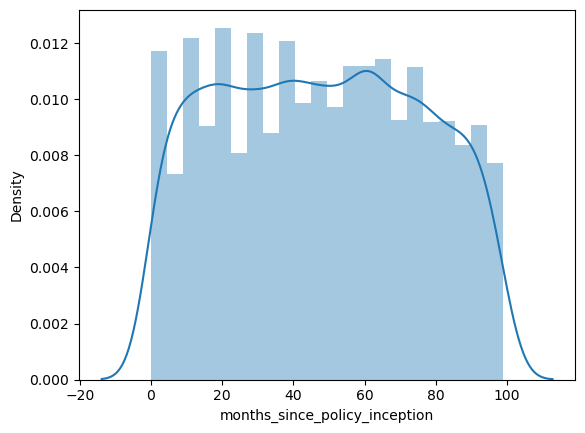

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


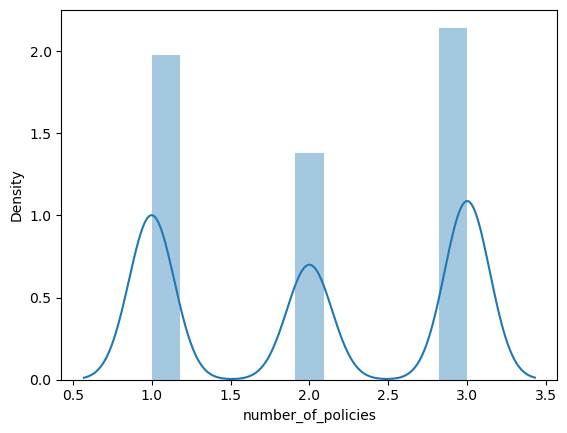

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


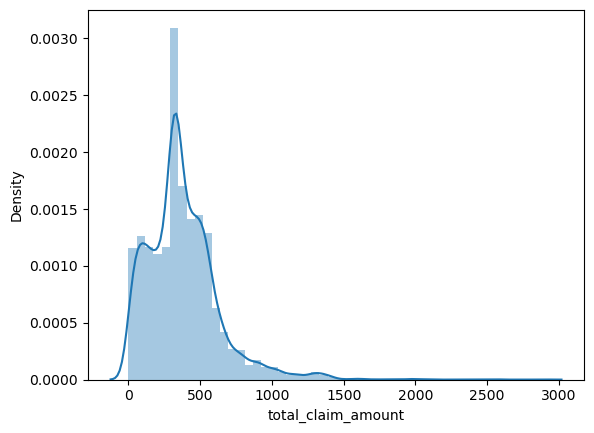

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


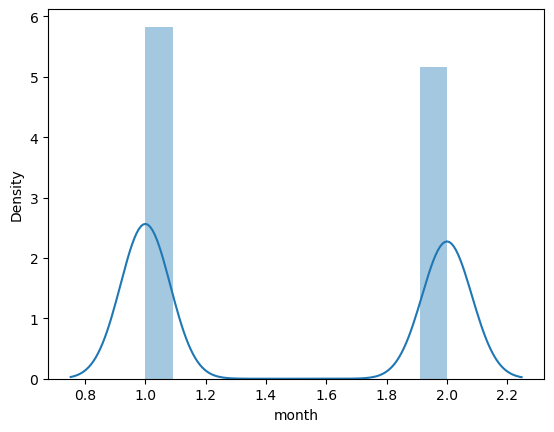

In [24]:
for i in numerical.columns:
    sns.distplot(numerical[i])
    plt.show()
    
##seaborn income

# sns.distplot(cs_2.income, hist=True)
# plt.show()

### Use Matplotlib to construct histograms

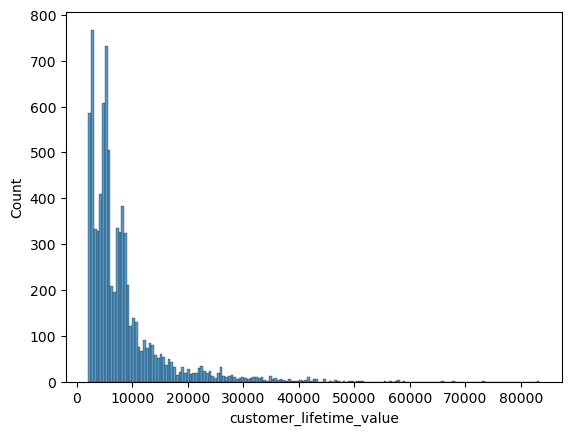

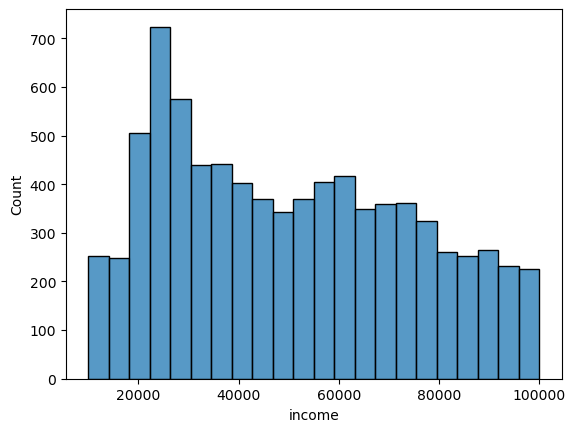

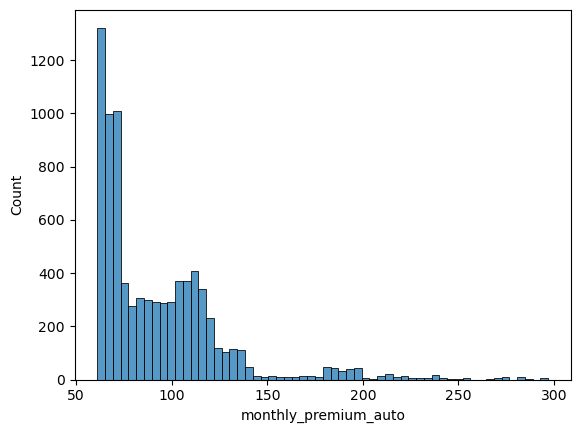

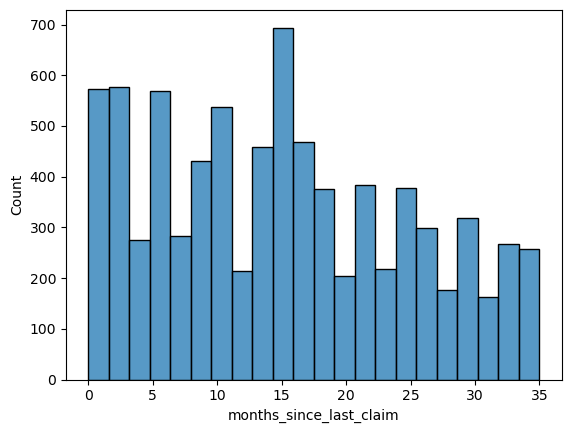

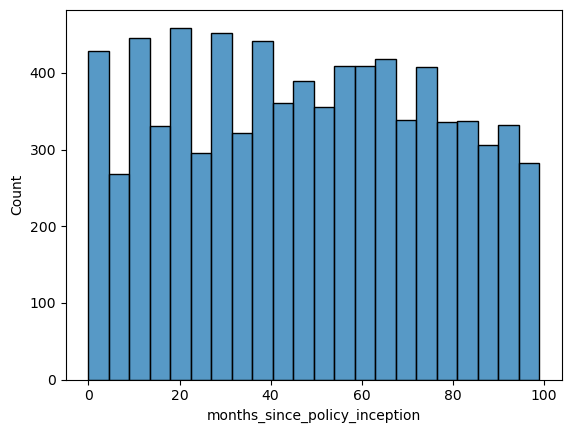

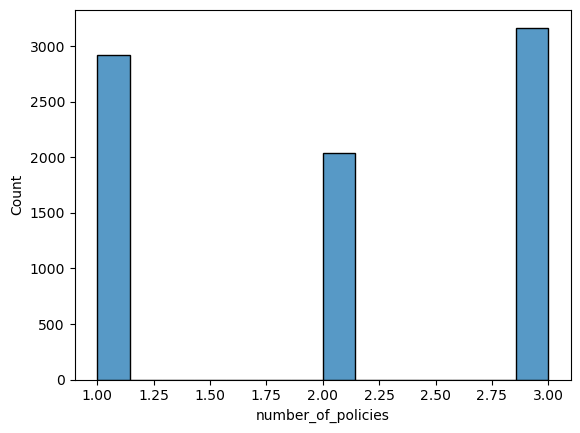

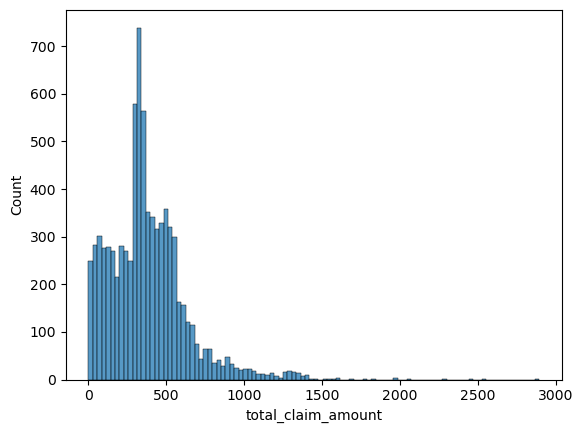

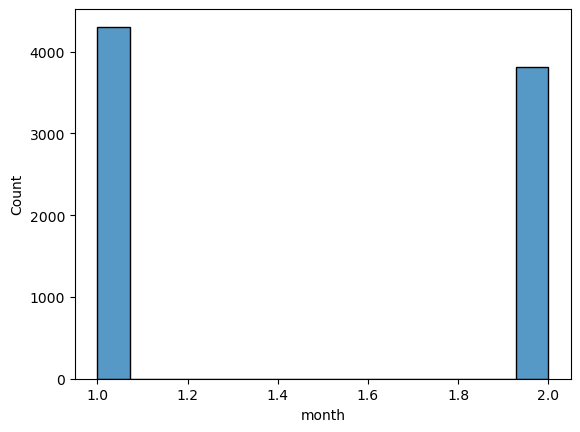

In [25]:
for i in numerical.columns:
    sns.histplot(numerical[i])
    plt.show()
    
#alternative
#plt.hist(cs_2.income)

#plt.show()
    

### normalize numerical

In [ ]:
#normalize numerical 

#Ziel der Normalisierung ist es, die Werte numerischer Spalten im Dataset so zu ändern,
#dass sie eine gemeinsame Skala verwenden, phne Unterschiede in den Wertebereichen zu verzerren oder Informationen zu verlieren

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_normalized = pd.DataFrame(numerical_scaled, columns=numerical.columns)

cs_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,month
0,0.033114,0.422396,0.000000,0.200000,0.525253,1.0,0.101279,1.0
1,0.157971,0.134550,0.165254,0.971429,0.313131,0.5,0.165918,1.0
2,0.248901,0.434059,0.152542,0.285714,0.030303,0.5,0.167300,0.0
3,0.085032,0.151628,0.237288,0.428571,0.313131,1.0,0.244729,0.0
4,0.032326,0.450414,0.000000,0.057143,0.737374,1.0,0.101279,1.0
...,...,...,...,...,...,...,...,...
8118,0.017967,0.203093,0.127119,0.285714,0.303030,0.0,0.226409,0.0
8119,0.008029,0.553878,0.055085,0.857143,0.828283,0.0,0.122710,0.0
8120,0.038655,0.568231,0.016949,0.200000,0.686869,1.0,0.094366,0.0
8121,0.268124,0.331317,0.593220,0.314286,0.636364,0.5,0.131697,1.0


check the multicollinearity between the features

In [ ]:
#checking with heatmap

fig,ax = plt.subplots(figsize=(7,4))
sns.heatmap(numerical.corr(),annot=True, ax=ax, cmap="seismic", center=0)
plt.show()

#no high correlation above 0.9 so there is no need to drop a column

## Acitivty 6 Processing Data

xy split

In [ ]:


sns.pairplot(cs_2)
plt.show()



In [27]:
X=cs_2.drop('total_claim_amount', axis=1)
y=cs_2.total_claim_amount

# we drop some useless columns


X= X.drop(columns = "effective_to_date") #-> independend


In [28]:
X_num = X.select_dtypes(include=np.number)
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,month
0,4809.0,48029,61,7.0,52,3,2
2,14948.0,22139,100,34.0,31,2,2
3,22332.0,49078,97,10.0,3,2,1
4,9025.0,23675,117,15.0,31,3,1
5,4745.0,50549,61,2.0,73,3,2
...,...,...,...,...,...,...,...
10902,3579.0,28304,91,10.0,30,1,1
10903,2772.0,59855,74,30.0,82,1,1
10906,5259.0,61146,65,7.0,68,3,1
10907,23893.0,39837,201,11.0,63,2,2


In [29]:
# standardising numerical -> scale 

X_scaled=StandardScaler().fit_transform(X_num)
X_scaled.shape


(8123, 7)

In [30]:
#categorical

X_cat=X.select_dtypes(include=np.object)

<ipython-input-30-b9dda72f6e9b>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat=X.select_dtypes(include=np.object)


In [31]:
X_cat

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,midwest,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,west_coast,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,west_coast,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
4,west_coast,No,Premium,Medical Leave,F,Suburban,Married,Personal Auto,Personal,Offer1,Branch,Four-Door Car,Medsize
5,NaN,NaN,Basic,Employed,M,Suburban,Divorced,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,west_coast,No,Extended,Employed,F,Suburban,Married,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,midwest,No,Basic,Employed,M,Suburban,Married,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,west_coast,No,Basic,Employed,F,Urban,Married,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize
10907,midwest,No,Extended,Employed,F,Rural,Married,Corporate Auto,Corporate,Offer1,Web,Luxury Car,Medsize


### One Hot/Label Encoding (categorical).

In [35]:


X=cs_2.drop('total_claim_amount', axis=1)
y=cs_2.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])



In [91]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,month
0,4809.0,48029,61,7.0,52,3,2
2,14948.0,22139,100,34.0,31,2,2
3,22332.0,49078,97,10.0,3,2,1
4,9025.0,23675,117,15.0,31,3,1
5,4745.0,50549,61,2.0,73,3,2


In [37]:
X_scaled=StandardScaler().fit_transform(numericals_features)
X_scaled.shape


(8123, 7)

In [38]:


categoricals_features = X.select_dtypes(object)
categoricals_features.head()



,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,midwest,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,west_coast,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,west_coast,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
4,west_coast,No,Premium,Medical Leave,F,Suburban,Married,Personal Auto,Personal,Offer1,Branch,Four-Door Car,Medsize
5,NaN,NaN,Basic,Employed,M,Suburban,Divorced,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize


In [39]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [40]:
categoricals_features

,state_west_coast,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
10903,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
10906,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
10907,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [41]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,month,state_west_coast,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.0,48029,61,7.0,52,3,2,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14948.0,22139,100,34.0,31,2,2,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,22332.0,49078,97,10.0,3,2,1,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,9025.0,23675,117,15.0,31,3,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5,4745.0,50549,61,2.0,73,3,2,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [44]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train


y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

In [45]:
y_pred

array([ 523.77046243,  504.95173991,  226.84518746, ...,  288.63143635,
       1023.16274555,   25.83824799])

In [46]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")


Text(0.5, 1.0, 'Train Residual histogram')

In [50]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))


In [51]:
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 11928.863893012265 -- test MSE: 15010.574969259469


In [52]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 11928.863893012265 -- test MAE: 15010.574969259469


In [54]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.7793880491382212
0.7793880491382212


In [55]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 0.8085668368592132 -- test R2: 0.7793880491382212


In [56]:
#adjusted rsquare

N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7781588229764779


In [57]:
#feature importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)


In [58]:
features_importances

,Attribute,Importance
15,location_code_Suburban,379.263819
16,location_code_Urban,221.825642
29,vehicle_class_Luxury Car,25.408976
23,renew_offer_type_Offer2,14.345017
24,renew_offer_type_Offer3,13.259447
12,employmentstatus_Medical Leave,11.664723
25,renew_offer_type_Offer4,8.558677
14,gender_M,8.178190
22,policy_Special,6.469333
20,policy_type_Special Auto,6.469333


## Comparing regression models

Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor.
Use feature selection techniques to select subset of features to train the model with(if necessary).
Check and discuss the results.

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
trans = PowerTransformer()
model = LinearRegression()

#linear regression -> done

In [74]:
#define function:

#By default, Sklearn train_test_split will make random partitions for the two subsets.
#However, you can also specify a random state for the operation.

def comp_models():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
    X_train = pd.DataFrame(X_train, columns= X.columns)
    X_test = pd.DataFrame(X_test, columns= X.columns)
    trans = PowerTransformer()
    model = LinearRegression()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
    trans.fit(X_train)

    X_train = trans.transform(X_train)
    X_test  = trans.transform(X_test)

    X_train = pd.DataFrame(X_train, columns = X.columns)
    X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
    model.fit(X_train, y_train)

    y_pred_train_lm = model.predict(X_train)
    y_pred_test_lm  = model.predict(X_test)

## KNN

In [117]:
X=numerical.drop('total_claim_amount',axis=1)
y=numerical.total_claim_amount

In [118]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [119]:
trans = PowerTransformer()
model = LinearRegression()

In [120]:

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model

model.fit(X_train, y_train)
y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [121]:
performance_lm, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm



/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-63-c81eb75181ba>:5: RuntimeWarning: overflow encountered in exp
  ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
<ipython-input-63-c81eb75181ba>:6: RuntimeWarning: overflow encountered in exp
  ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))
<ipython-input-63-c81eb75181ba>:8: RuntimeWarning: overflow encountered in exp
  MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [107]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification

# initializeneigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=10)

In [108]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=10)

In [109]:
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-63-c81eb75181ba>:5: RuntimeWarning: overflow encountered in exp
  ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
<ipython-input-63-c81eb75181ba>:6: RuntimeWarning: overflow encountered in exp
  ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))
<ipython-input-63-c81eb75181ba>:8: RuntimeWarning: overflow encountered in exp
  MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [110]:
getting rid of infinity


numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/pandas/core/frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
